In [2]:
import other_predictors as op
import numpy as np
import time
import networkx as nx
from load_data import load_data
from effective_transition import effectiveTransition, weightedEffectiveTransition
import matplotlib.pyplot as plt
import spectral_embed as se
import pandas as pd

In [3]:
def get_predictions(fname):
        filename = 'data/'+fname+'.txt'
        G, to_predict, fullG = load_data(filename)
        print('\n%s' % fname)
        print(len(G.nodes()))
        

        # create storage
        names, accs, times = [], [], []

        # shortest path
        start = time.time()
        pred = op.shortestPath(G)
        acc = pred.accuracy(true_graph=fullG, k=len(to_predict))
        end = time.time() - start
        print('\t\t\tAccuracy\t\tTime')
        print('Shortest Path\t\t{}\t\t\t{}'.format(round(acc,5),round(end,5)))
        names.append('Shortest\nPath')
        accs.append(acc)
        times.append(end)


        # common neighbors
        start = time.time()
        pred = op.commonNeighbors(G)
        acc = pred.accuracy(true_graph=fullG, k=len(to_predict))
        end = time.time() - start
        print('Common Neighbors\t{}\t\t\t{}'.format(round(acc,5),round(end,5)))
        names.append('Common\nNeighbors')
        accs.append(acc)
        times.append(end)

        # effective transition
        start = time.time()
        pred = effectiveTransition(G)
        acc = pred.accuracy(true_graph=fullG, k=len(to_predict))
        end = time.time() - start
        print('Effective Transition\t{}\t\t\t{}'.format(round(acc,5),round(end,5)))
        names.append('Effective\nTransition')
        accs.append(acc)
        times.append(end)

        # weighted effective transition
        start = time.time()
        pred = weightedEffectiveTransition(G)
        acc = pred.accuracy(true_graph=fullG, k=len(to_predict))
        end = time.time() - start
        print('Weighted ET\t\t{}\t\t\t{}'.format(round(acc,5),round(end,5)))
        names.append('Weighted\nET')
        accs.append(acc)
        times.append(end)

        # spectral embedding
        start = time.time()
        pred = se.spectralEmbed(G, dim=4)
        acc = pred.accuracy(true_graph=fullG, k=len(to_predict))
        end = time.time() - start
        print('Spectral Embed\t\t{}\t\t\t{}'.format(round(acc,5),round(end,5)))
        names.append('Spectral\nEmbed')
        accs.append(acc)
        times.append(end)

        return names, accs, times


haggledata
178
			Accuracy		Time
Shortest Path		0.0378			0.03667
Common Neighbors	0.00017			0.01127
Effective Transition	0.0125			28.15355
Weighted ET		0.01881			28.1399
Spectral Embed		0.02985			0.99524


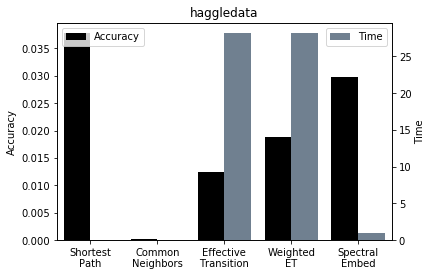


hypertextdata
111
			Accuracy		Time
Shortest Path		0.11139			0.01866
Common Neighbors	0.02982			0.0048
Effective Transition	0.09331			5.31079
Weighted ET		0.0568			5.10413
Spectral Embed		0.10954			0.1273


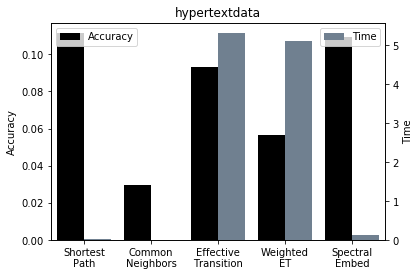


infectiousdata
314
			Accuracy		Time
Shortest Path		0.01086			0.10043
Common Neighbors	0.00153			0.0499


KeyboardInterrupt: 

In [5]:
#filenames = ['haggledata','hypertextdata','infectiousdata','hepph','hepth','facebookWSON','facebook','internet','reality_miningdata']
filenames = ['haggledata','hypertextdata','infectiousdata','reality_miningdata']
#filenames = ['hypertextdata','reality_miningdata']

for fname in filenames:
        nms, accs, tms = get_predictions(fname)

        d = {'':nms,'acc':accs,'timer':tms}
        df = pd.DataFrame(data=d)
        df = df.set_index('')

        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax2 = ax.twinx()

        width = .4
        a = df.acc.plot.bar(color='black',ax=ax, width=width,position=1,label='Accuracy',rot=0)
        b = df.timer.plot(kind='bar',color='slategrey', ax=ax2,width=width,position=0,label='Time')

        ax.set_ylabel('Accuracy')
        ax2.set_ylabel('Time')
        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')
        plt.title(fname)
        plt.xlabel('')
        plt.xlim(-.5,4.5)
        plt.show()
        #plt.savefig('results/'+fname+'_results.png')

In [10]:
fname = 'hypertextdata'
filename = 'data/'+fname+'.txt'
G, to_predict, fullG = load_data(filename)
A = nx.adjacency_matrix(G)
M = (A/np.sum(A,axis=1)).T

In [12]:
np.sum(M[:,0])

0.9999999999999999

In [14]:
import numpy as np
import networkx as nx
from scipy.sparse import csr_matrix
from base_predictor import basePredictor
import helper_functions as hf


def _compute(i, j, step, curr, path):
        if step < steps:
                for n in range(num_nodes):
                        if M[n,j] != 0 and n != i:
                                if n not in path:
                                        R[i,n] += curr*M[n,j]
                                _compute(i,n,step+1,M[n,j]*curr,path+[n])


steps = 10
num_nodes = len(G.nodes())
A = nx.adjacency_matrix(G)
degrees = np.sum(A, axis=1)
M = (A/degrees).T
print(np.sum(M[:,0]))
R = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes):
        _compute(i, i,0, 1, [i])

0.9999999999999999


KeyboardInterrupt: 